# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [6]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

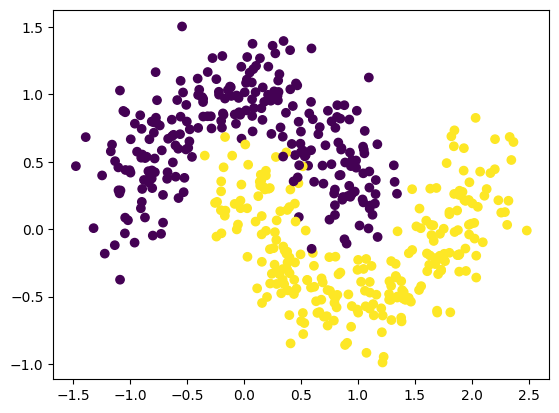

In [15]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

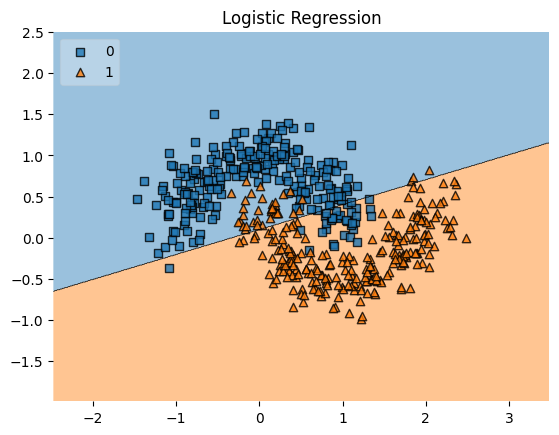

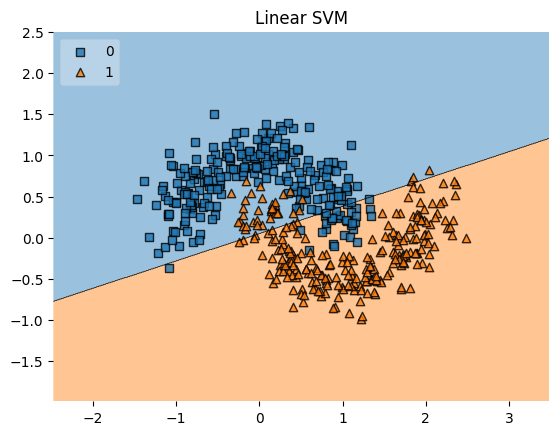

Logistic Regression Accuracy: 0.86
Linear SVM Accuracy: 0.86


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Train Logistic Regression
lr = LogisticRegression(C=1.0)
lr.fit(moons_points, moons_labels)

# Train Linear SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(moons_points, moons_labels)

# Plot decision regions for Logistic Regression
plot_decision_regions(moons_points, moons_labels, clf=lr, legend=2)
plt.title('Logistic Regression')
plt.show()

# Plot decision regions for Linear SVM
plot_decision_regions(moons_points, moons_labels, clf=svm, legend=2)
plt.title('Linear SVM')
plt.show()

# Calculate and print a preferred classification metric (e.g., accuracy)
from sklearn.metrics import accuracy_score

lr_predictions = lr.predict(moons_points)
svm_predictions = svm.predict(moons_points)

lr_accuracy = accuracy_score(moons_labels, lr_predictions)
svm_accuracy = accuracy_score(moons_labels, svm_predictions)

print(f'Logistic Regression Accuracy: {lr_accuracy:.2f}')
print(f'Linear SVM Accuracy: {svm_accuracy:.2f}')


## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

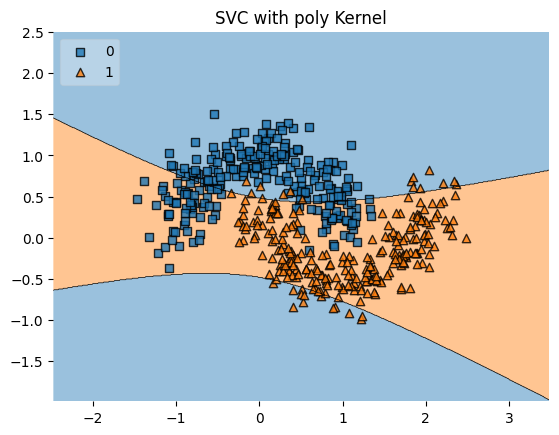

poly Kernel dg=2- Accuracy: 0.75


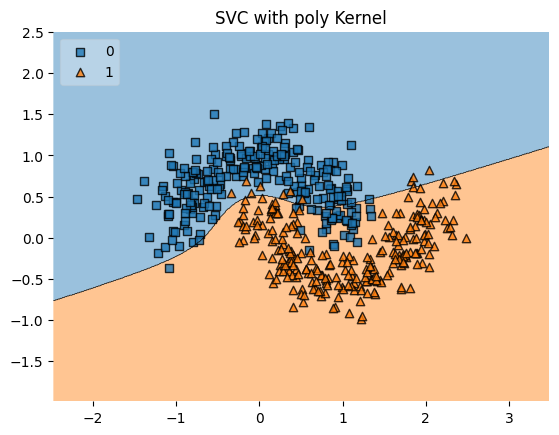

poly Kernel dg=3- Accuracy: 0.91


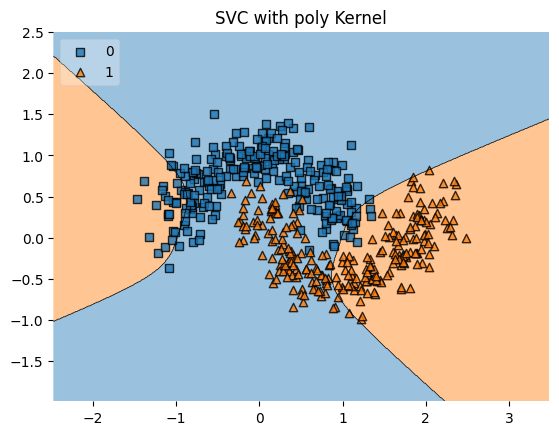

poly Kernel dg=4- Accuracy: 0.69


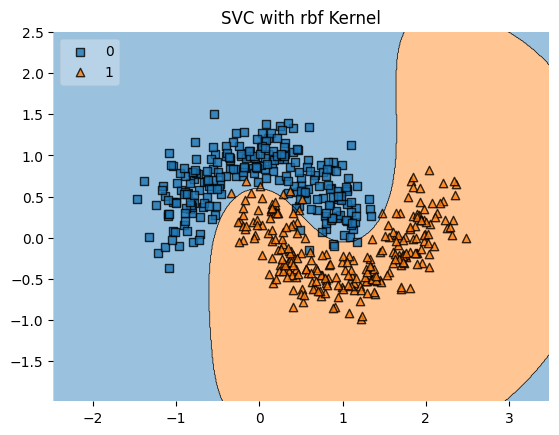

rbf Kernel dg=None- Accuracy: 0.97


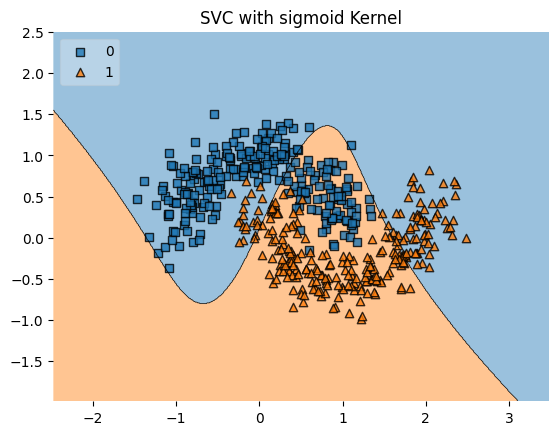

sigmoid Kernel dg=None- Accuracy: 0.65


In [11]:
from sklearn.svm import SVC

# Function to train and evaluate SVC with different kernels
def train_evaluate_svc_kernel(kernel_name, degree=None, C=1.0):
    # Train SVC with the specified kernel
    if kernel_name == 'poly':
        if degree is not None:
            svc = SVC(kernel=kernel_name, degree=degree, C=C)
        else:
            svc = SVC(kernel=kernel_name, C=C)
    else:
        svc = SVC(kernel=kernel_name, C=C)

    svc.fit(moons_points, moons_labels)

    # Plot decision regions
    plot_decision_regions(moons_points, moons_labels, clf=svc, legend=2)
    plt.title(f'SVC with {kernel_name} Kernel')
    plt.show()

    # Calculate and print the chosen metric (e.g., accuracy)
    predictions = svc.predict(moons_points)
    accuracy = accuracy_score(moons_labels, predictions)
    print(f'{kernel_name} Kernel dg={degree} - Accuracy: {accuracy:.2f}')

# Experiment with different kernels
kernels = ['poly', 'rbf', 'sigmoid']
degrees = [2, 3, 4]

for kernel in kernels:
    if kernel == 'poly':
        for degree in degrees:
            train_evaluate_svc_kernel(kernel, degree=degree)
    else:
        train_evaluate_svc_kernel(kernel)


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [20]:
print(moons_labels)

[1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0
 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0
 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 0 

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Generate polynomial features
degree = 2
poly = PolynomialFeatures(2)
moons_points_poly = poly.fit_transform(moons_points)

# Train Logistic Regression on the new features
lr_poly = LogisticRegression()
lr_poly.fit(moons_points_poly, moons_labels)

# Plot decision regions for Logistic Regression with polynomial features
# Decision region for feature 3 = 1.5
value = 1.5
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 0.75
plot_decision_regions(moons_points_poly, moons_labels, clf=lr_poly, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width}
                      )
plt.title(f'Logistic Regression with Polynomial Features (Degree {degree})')
plt.show()

# Calculate and print the metric for Logistic Regression with polynomial features
lr_poly_predictions = lr_poly.predict(moons_points_poly)
lr_poly_accuracy = accuracy_score(moons_labels, lr_poly_predictions)
print(f'Logistic Regression with Polynomial Features - Accuracy: {lr_poly_accuracy:.2f}')

# Compare SVM's results with Logistic Regression
# You can use the same degree for PolynomialFeatures as you did for SVM's 'poly' kernel

# Re-run the SVM with the same degree
svc_poly = SVC(kernel='poly', degree=degree, C=1.0)
svc_poly.fit(moons_points, moons_labels)

# Plot decision regions for SVM with 'poly' kernel and the same degree
plot_decision_regions(moons_points, moons_labels, clf=svc_poly, legend=2)
plt.title(f'SVM with Polynomial Kernel (Degree {degree})')
plt.show()

# Calculate and print the metric for SVM with 'poly' kernel and the same degree
svc_poly_predictions = svc_poly.predict(moons_points)
svc_poly_accuracy = accuracy_score(moons_labels, svc_poly_predictions)
print(f'SVM with Polynomial Kernel - Accuracy: {svc_poly_accuracy:.2f}')


Logistic Regression with Polynomial Features - Accuracy: 0.86
SVM with Polynomial Kernel - Accuracy: 0.75


ValueError: ignored

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

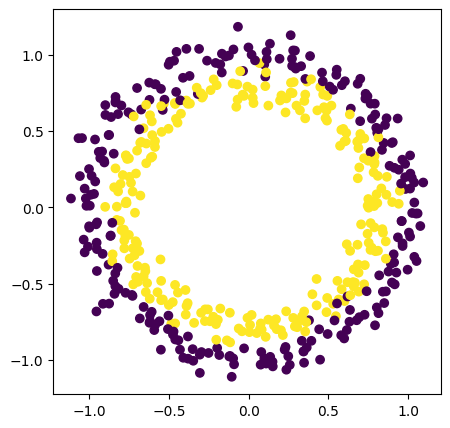

In [35]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

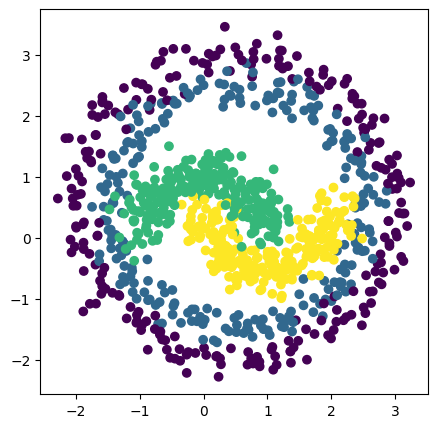

In [36]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Logistic Regression with Polynomial Features - Accuracy: 0.92


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


SVM with RBF Kernel - Accuracy: 0.92


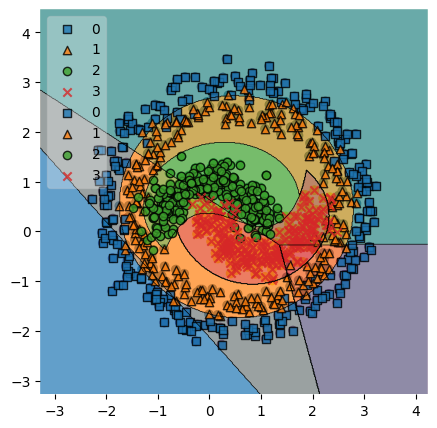

In [42]:

from sklearn.datasets import make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate the new dataset
# circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)
# points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
# labels = np.hstack((circles_labels, moons_labels + 2))

# Plot the upgraded dataset
plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

# Approach 1: Logistic Regression with generated features
degree = 3  # You can adjust the degree as needed
poly = PolynomialFeatures(degree=degree, include_bias=False)
points_poly = poly.fit_transform(points)
lr_poly = LogisticRegression()
lr_poly.fit(points_poly, labels)
lr_poly_predictions = lr_poly.predict(points_poly)

# Plot decision boundaries for Logistic Regression with polynomial features
plot_decision_regions(points_poly, labels, clf=lr_poly, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6:value, 7:value, 8:value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6:width, 7:width, 8:width})
# Calculate and print the accuracy for Logistic Regression with polynomial features
lr_poly_accuracy = accuracy_score(labels, lr_poly_predictions)
print(f'Logistic Regression with Polynomial Features - Accuracy: {lr_poly_accuracy:.2f}')

# Approach 2: SVM with an appropriate kernel
# You can experiment with different kernel choices and parameters
svm = SVC(kernel='rbf', C=1.0)
svm.fit(points, labels)
svm_predictions = svm.predict(points)

# Plot decision boundaries for SVM with an appropriate kernel
plot_decision_regions(points, labels, clf=svm, legend=2)
# Calculate and print the accuracy for SVM
svm_accuracy = accuracy_score(labels, svm_predictions)
print(f'SVM with RBF Kernel - Accuracy: {svm_accuracy:.2f}')

# You can add other models and approaches to demonstrate their performance

# Justification:
# The dataset is more complex with both circular and moon-shaped clusters, making it challenging for simple models.
# Logistic Regression with polynomial features and SVM with an RBF kernel can capture non-linear decision boundaries.
# The choice of kernel and hyperparameters in SVM can significantly impact performance.
# Additional models may be needed to address the complexity of the dataset effectively.
